Nama : Masdarul Rizqi <br>
NIM : 41215305 <br>
Kelas : TI-2021-KIP-P5 <br>
Mata Kuliah : Deep Learning Lanjut <br>
Tugas : customer segmentation clustering ede eport
## **Solving data science use case finding meaningful segmentation of customers**
Memecahkan kasus penggunaan ilmu data menemukan segmentasi pelanggan yang bermakna Dalam proyek ini saya mencoba untuk menarik
segmen yang berarti dari data pelanggan dari perusahaan bahan makanan segmen ini akan membantu compainy untuk mendapatkan
pemahaman yang lebih baik tentang pelanggan mereka perilaku dan kesamaan dan mengoptimalkan produk atau cara pemasaran mereka.
Saya menggunakan cara terstruktur untuk menyelesaikan kasus penggunaan ini, jadi ikuti saya dan perhatikan tulisannya
### **Clearilyfi ng Problem :**
Ajukan beberapa pertanyaan klarifi kasi kepada diri saya sendiri untuk mendefi nisikan dan mencakup masalah
Apa tujuan bisnis dari segmentasi ? Apakah aplikasi untuk reearch produk atau pemasaran? Haruskah saya fokus pada pelanggan yang
menggunakan produk tertentu atau menggunakan promosi tertentu?
### **Constrained Problem**
based on clearyfi caiton i will foucs on segmenting customers to help marketing team create customer profi les that can help them perform
target marketing Berdasarkan ClearyFicaiton saya akan foucs pada segmentasi pelanggan untuk membantu tim pemasaran membuat profi l
pelanggan yang dapat membantu mereka melakukan pemasaran target


##### **Memanggil Library/ Module**

In [1]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import datetime as dt
import pandas as pd
import numpy as np
import os, zipfile
import matplotlib.pyplot as plt
from matplotlib import colors
import plotly.offline as pyo
from termcolor import cprint
import plotly.express as px
import seaborn as sns
import warnings
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline

### **Data**

In [2]:
colorpalt = ["#d62828", "#4169E1", "#FFFF00", "#00FF00"]
sns.set(style="darkgrid",color_codes=True)
warnings.filterwarnings('ignore')

In [3]:
for dirname, _, filenames in os.walk('./data/marketing_campaign.xlsx'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### **Loading the data**

In [4]:
df = pd.read_excel('./data/marketing_campaign.xlsx')
df.head()

,Unnamed: 0,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.isnull().sum()

Unnamed: 0              0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

## **Feature engineering and Data preprocessing**
### **Drop null values**

In [7]:
df = df.dropna()
df.duplicated().sum()

0

### **Convert Dt_Customer dtype to date**
Untuk mendapatkan informasi seperti pelanggan terlama dan pelanggan terbaru atau durasi kerjasama mereka dengan perusahaan, kami
perlu memiliki tanggal pendaftaran mereka.

In [8]:
df['Dt_Customer'] = df['Dt_Customer'].apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%d"))

### **Crate Dt_Collab column**
Kolom ini menunjukkan sudah berapa lama sejak pendaftaran pengguna. Perhatikan bahwa saya menggunakan tahun penerbitan data ini, i.n. 2021, karena data ini mungkin telah berubah pada tahun ini yaitu 2022

In [9]:
df['Dt_Collab'] = 2024 - df['Dt_Customer'].dt.year
print('Number of Customer for many years : green')
df['Dt_Collab'].value_counts()

Number of Customer for many years : green


Dt_Collab
11    1173
10     553
12     490
Name: count, dtype: int64

### **Create Age Column**

In [10]:
df['Age'] = 2024 - df['Year_Birth']
df['Age'].agg(['min', 'mean', 'max'])

min      28.000000
mean     55.179603
max     131.000000
Name: Age, dtype: float64

### **Delete outlier (vampires in this case :D) datapoints based on Age column**
Seperti yang Anda lihat, kami memiliki beberapa pelanggan vampir yang berusia lebih dari seratus tahun! :D.Dan sekitar dua pelanggan berusia antara 79
dan 100 tahun, jadi kami menganggapnya sebagai outlier. outlier pada dasarnya adalah titik data yang jauh dari mean data. Kita juga bisa menggunakan
IQR atau skor-z untuk mengidentifikasinya, tetapi dalam kasus ini Tidak diperlukan

In [11]:
print('Number of customers with age of higher than 79 are ',len(df.loc[df['Age'] > 79]))

Number of customers with age of higher than 79 are  18


In [12]:
df = df.loc[df['Age'] < 79]

### **Simplifying Education categories**
Sesuai dengan tingkat pendidikan pelanggan, saya akan mengubahnya menjadi Sarjana dan Pascasarjana, ini akan membuat kolom dimensi
lebih mudah.

In [13]:
df['Education'].value_counts()

Education
Graduation    1111
PhD            467
Master         360
2n Cycle       198
Basic           54
Name: count, dtype: int64

In [14]:
def simplifying_education(x):
    """
    Simplifying customer Education to Undergraduate if its 2n Cycle or Basic
    if not convert it to Graduate
    
    x: customer Education level from Education column
    
    Returns:
    Undergraduate - Graduate
    """
    if x =='2n Cycle'  or  x =='Basic' :
        return 'Undergraduate'
    else : 
        return 'Graduate'
    
df["Education"] = df["Education"].apply(lambda x : simplifying_education(x))

### **Simplifying Marital_Status**
Sesuai dengan status perkawinan pelanggan, saya akan mengonversinya menjadi Accompanied dan GradAloneuate,smae seperti di atas ini akan membuat kolom dimensi lebih mudah dan dalam hal ini sangat membantu untuk lebih memanfaatkan nilai (Alone,YOLO,Absurd) yang tadinya titik data rendah

In [15]:
df['Marital_Status'].value_counts()

Marital_Status
Married     847
Together    570
Single      465
Divorced    228
Widow        73
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [16]:
def simplifying_maritalstatus(x):
    """
    Simplifying customer marital status to Accompanied if he/she was married or had a partner
    if not Alone
    
    
    x: customer marital status from Marital_Status column
    
    Returns:
    Accompanied - Alone
    """
    if x == "Married" or  x=="Partner" :
        return 'Inrelationship'
    else : 
        return 'Single'
    
df["Marital_Status"] = df["Marital_Status"].apply(lambda x : simplifying_maritalstatus(x))
df['Marital_Status'].value_counts()

Marital_Status
Single            1343
Inrelationship     847
Name: count, dtype: int64

#### **Labeling categorial columns**
Label yang mengkodekan fitur kategorikal

In [17]:
maritalstatus_dictionary = {'Single':1 , 'Inrelationship':2}
df =  df.replace({'Marital_Status':maritalstatus_dictionary})

education_dictionary = {'Undergraduate':0 , 'Graduate':1}
df = df.replace({'Education':education_dictionary})

#### **Create Children Column**


In [18]:
df["Children"] = df["Kidhome"] + df["Teenhome"]

#### **Create FamilySize Column**


In [19]:
df["FamilySize"] = df['Marital_Status']+df['Children']

#### **Create TotalSpent column**
Perhatikan saya tidak menambahkan Pembelian NumErals (pembelian dilakukan dengan diskon) karena produk yang dibeli dengan diskon dapat menyertakan produk yang dibeli dan duplikat akan dibuat

In [20]:
df["TotslSpent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
df['TotslSpent'].agg(['min', 'mean', 'max'])

min        5.000000
mean     602.319178
max     2525.000000
Name: TotslSpent, dtype: float64

#### **Total Promotions column**

In [21]:
df['TotalPromotions'] = df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['AcceptedCmp1']+df['AcceptedCmp2'] 

#### **Create TotalPurchases column**

In [22]:
df['TotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases']+df['NumStorePurchases']
df['TotalPurchases'].agg(['min', 'mean', 'max'])

min      0.00000
mean    12.49863
max     32.00000
Name: TotalPurchases, dtype: float64

In [23]:
df['Income'].agg(['min', 'mean', 'max'])

min       1730.000000
mean     52079.040639
max     666666.000000
Name: Income, dtype: float64

In [24]:
df = df.loc[df['Income'] < 600000.0]
df = df.drop(['Dt_Customer','Year_Birth','Z_CostContact', 'Z_Revenue', 'Response','Complain','NumWebVisitsMonth','AcceptedCmp1' , 'AcceptedCmp2', 'AcceptedCmp3' , 'AcceptedCmp4','AcceptedCmp5'],axis=1)

#### **Correlation between variables**
Di bagian ini, saya memeriksa korelasi antar variabel. Semakin tinggi korelasinya maka skornya semakin mendekati 1. Semakin rendah skornya maka semakin mendekati -1. Misalnya, jumlah pembelian berkorelasi dengan pendapatan. Semakin banyak pendapatan yang dimiliki pelanggan, semakin banyak dia membeli

<Axes: >

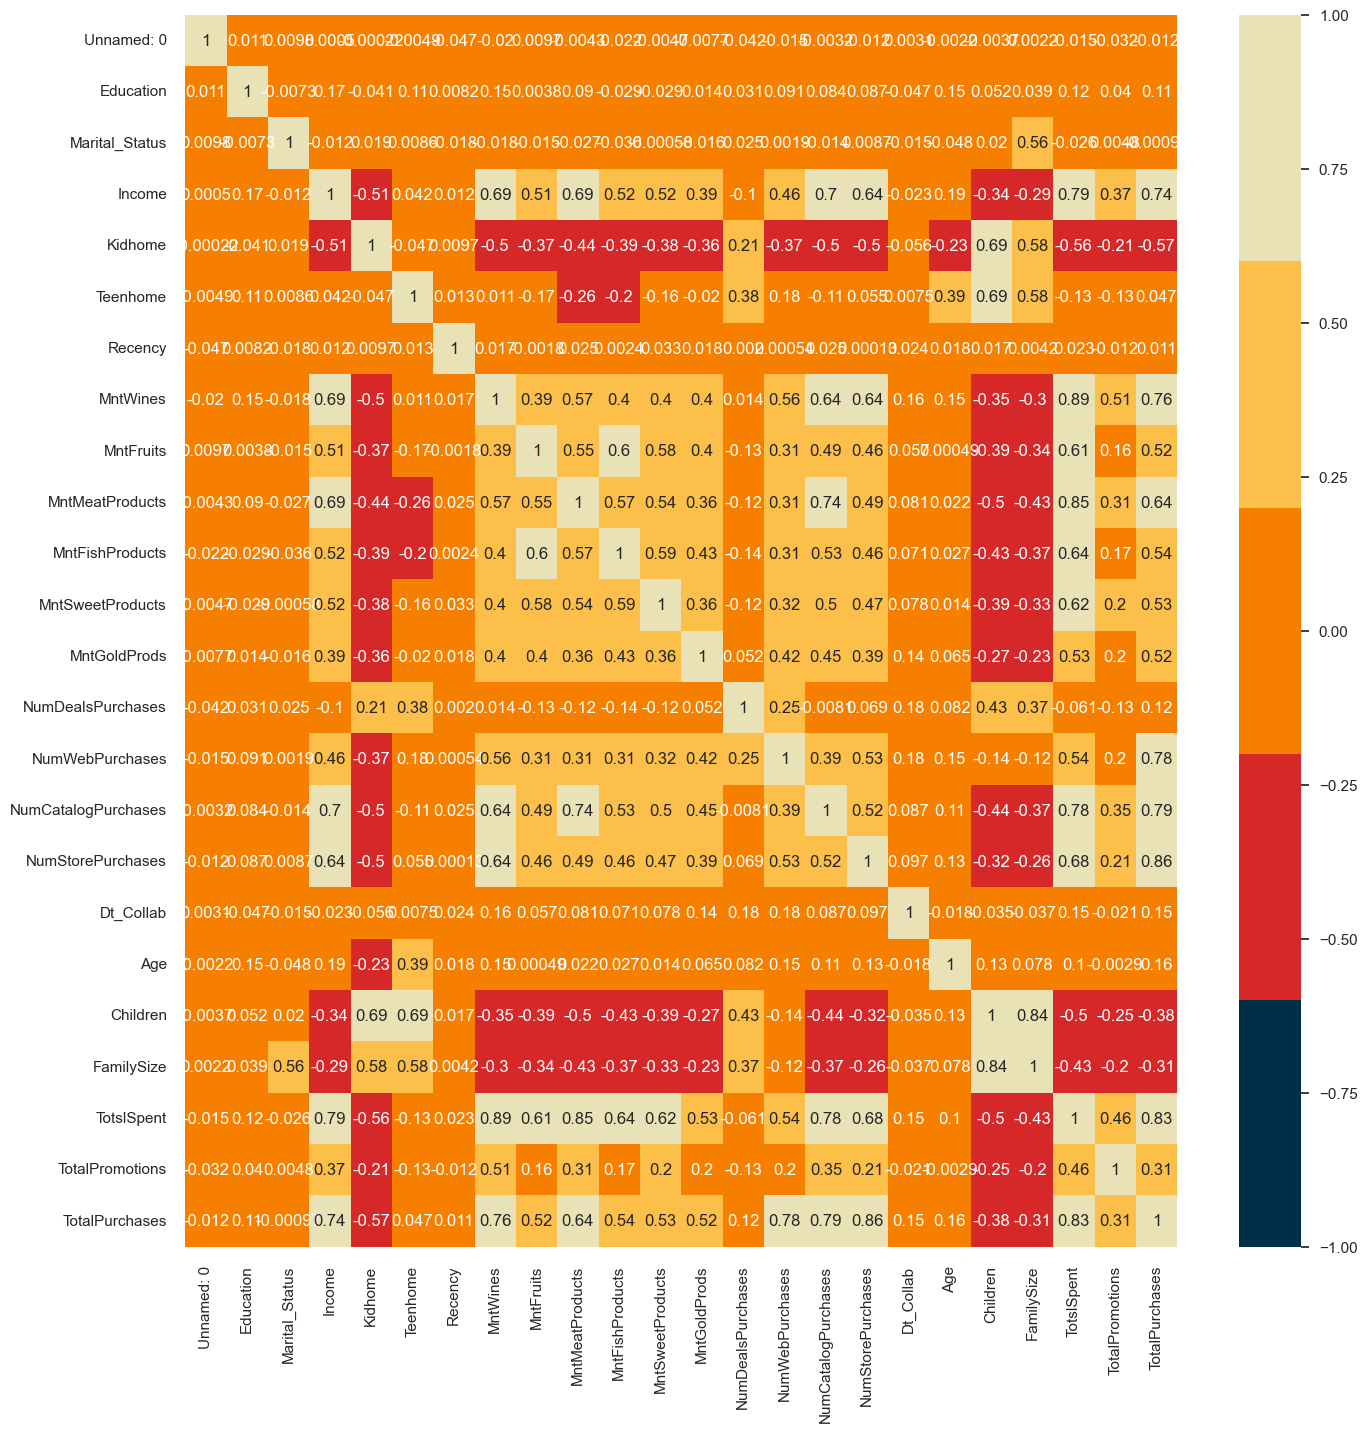

In [25]:
cmap = colors.ListedColormap(["#003049","#d62828", "#f77f00", "#fcbf49", "#eae2b7"])
corr= df.corr()
plt.figure(figsize=(16,16))  
sns.heatmap(corr,annot=True, cmap=cmap,vmax=1,vmin=-1)

In [26]:
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[25:85]

TotslSpent           MntWines               0.892893
NumStorePurchases    TotalPurchases         0.862459
TotalPurchases       NumStorePurchases      0.862459
MntMeatProducts      TotslSpent             0.845384
TotslSpent           MntMeatProducts        0.845384
FamilySize           Children               0.840908
Children             FamilySize             0.840908
TotalPurchases       TotslSpent             0.825215
TotslSpent           TotalPurchases         0.825215
                     Income                 0.794296
Income               TotslSpent             0.794296
NumCatalogPurchases  TotalPurchases         0.788915
TotalPurchases       NumCatalogPurchases    0.788915
TotslSpent           NumCatalogPurchases    0.781287
NumCatalogPurchases  TotslSpent             0.781287
NumWebPurchases      TotalPurchases         0.775926
TotalPurchases       NumWebPurchases        0.775926
                     MntWines               0.759054
MntWines             TotalPurchases         0.

#### **Standraize Data**
Izinkan saya memberi Anda sebuah contoh: misalkan model cluster adalah seseorang dan model tersebut seharusnya memisahkan makanan yang Anda lihat berdasarkan bahan di dalamnya saat Anda mencicipinya. Bahan-bahannya bisa memiliki dimensi yang berbeda-beda. Secara terpisah, hal yang sama juga terjadi di sini. Unit pengukuran fitur kami tidak sama. Misal penghasilan bisa sampai seribu, tapi umur bisa sampai maksimal 100. Makanya kita standarisasi datanya atau misalnya standarisasi takaran makanan kita. Kami memudahkan model dalam membedakan jenis makanan :D

In [27]:
std_scaler = StandardScaler()
std_data = std_scaler.fit_transform(df)
scaled_df = pd.DataFrame(std_data,columns= df.columns)

### **Reduce Data Dimension**
Pada bagian tersebut, untuk lebih memahaminya, saya menggunakan contoh pengenalan makanan oleh seseorang berdasarkan bahan-bahan yang digunakan dalam makanan tersebut. Jika suatu makanan mengandung banyak bahan yang rasanya mirip satu sama lain, maka akan sulit untuk mengenalinya, sehingga kombinasi makanan yang rasanya mirip satu sama lain akan mengurangi jumlah bahan yang digunakan dalam makanan tersebut. Disini kita menggunakan PCA yaitu suatu teknik untuk mengurangi dimensi dengan meminimalkan kehilangan informasi.

In [28]:
pca = PCA(3,svd_solver='full')
pca.fit(scaled_df)
lowdim_df = pca.transform(scaled_df)

columns = ['pca_comp_%i' % i for i in range(3)]
df_pca  = pd.DataFrame(lowdim_df, columns=columns, index=scaled_df.index)
df_pca.head()

,pca_comp_0,pca_comp_1,pca_comp_2
0,5.008593,-0.580838,0.190809
1,-3.253977,0.611494,-1.458668
2,2.542517,-0.992317,-1.068973
3,-2.689366,-1.819788,-0.208430
4,-0.534279,0.361085,1.710972


In [29]:
fig = px.scatter_3d(df_pca, x='pca_comp_0', y='pca_comp_1', z='pca_comp_2',size_max=20 ,color_discrete_sequence=['#eae2b7'],
title="PCA Output Visualization")
fig.update_traces(marker=dict(size=8,line=dict(width=2,color='#d62828')),selector=dict(mode='markers'))
fig.update_layout(autosize=False,
    width=700,
    height=680,)
fig.show()

### **Clustering Data**
Sekarang data kita sudah siap, saatnya mengelompokkannya. Untuk data ini, saya menggunakan algoritma Kmeans, yang merupakan algoritma pembelajaran mesin tanpa pengawasan yang terkenal dan kuat. k-means clustering mencoba mengelompokkan item serupa dalam bentuk cluster. Ia menemukan kesamaan antara item dan mengelompokkannya ke dalam cluster dengan menginisialisasi centroid dan memilih grup dan menemukan rata-ratanya

  File "c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


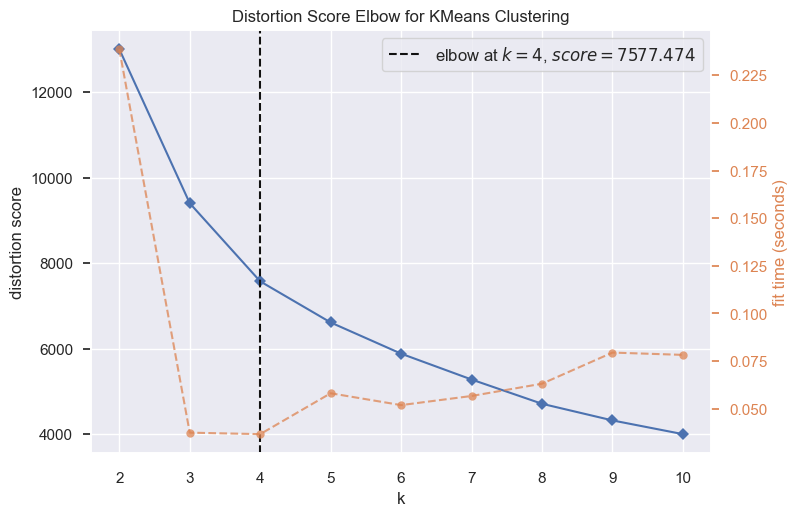

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_pca)
Elbow_M.show()

#### **Fit reduced dimension data into Kmeans**

In [31]:
KM = KMeans(n_clusters=4)
km_pred = KM.fit_predict(df_pca)

df["Cluster"]= km_pred
df_pca["Cluster"] = km_pred


fig = px.scatter_3d(df_pca, x='pca_comp_0', y='pca_comp_1', z='pca_comp_2',
title="Clusters Visualization",color="Cluster")
fig.update_traces(marker=dict(size=4),selector=dict(mode='markers'))
fig.update_layout(autosize=False,
    width=700,
    height=680,)
fig.show()

## **EDA clusters**


Total members of each cluster :
Cluster
3    663
2    538
0    535
1    453
Name: count, dtype: int64
**************************************************


Text(0.5, 1.0, 'Total members of each cluster')

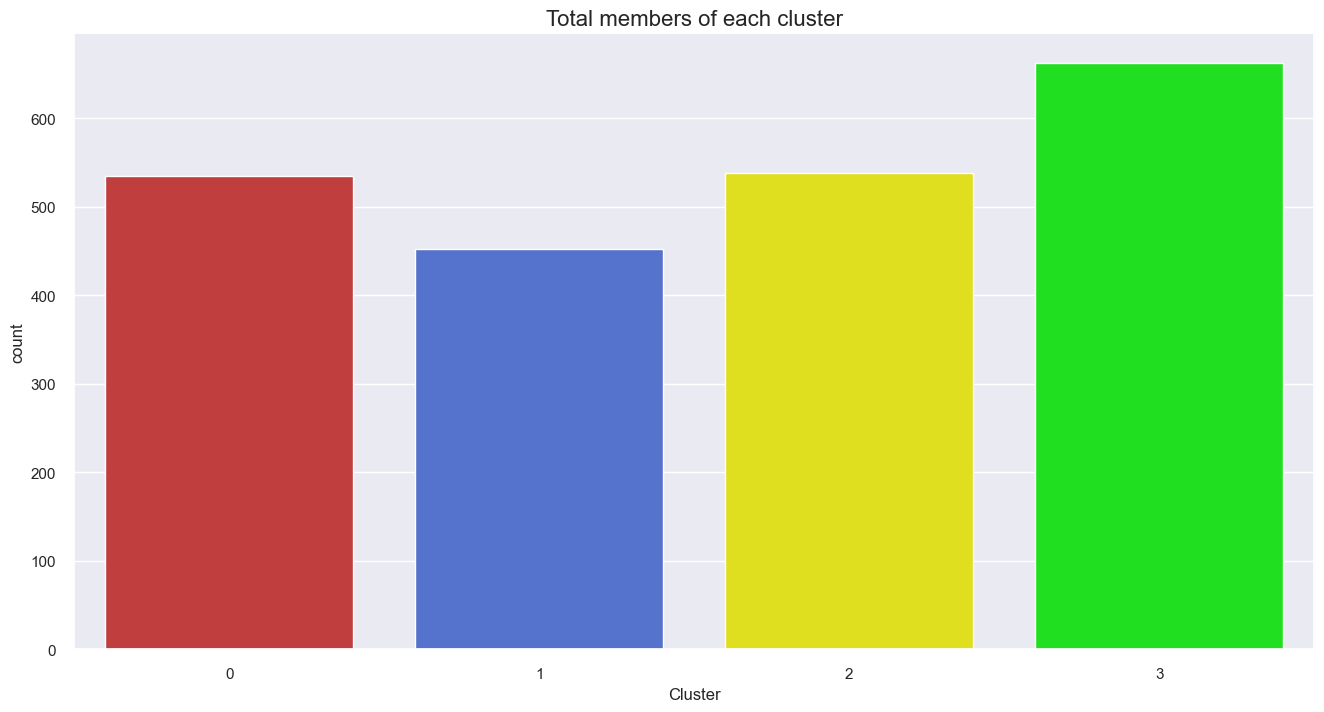

In [32]:
cprint('Total members of each cluster :','green')
print(df['Cluster'].value_counts())
cprint('*'*50,'green')
plt.rcParams['figure.figsize'] = (16, 8)
countcluster=sns.countplot(x='Cluster', data=df,palette=colorpalt)
countcluster.set_title('Total members of each cluster',fontsize=16)

             Income  TotslSpent
Cluster                        
0        32394753.0      437765
1        18925044.0       65086
2        40706303.0      748278
3        21360333.0       67888
**************************************************


Text(0.5, 1.0, 'Income vs Spent of each cluster')

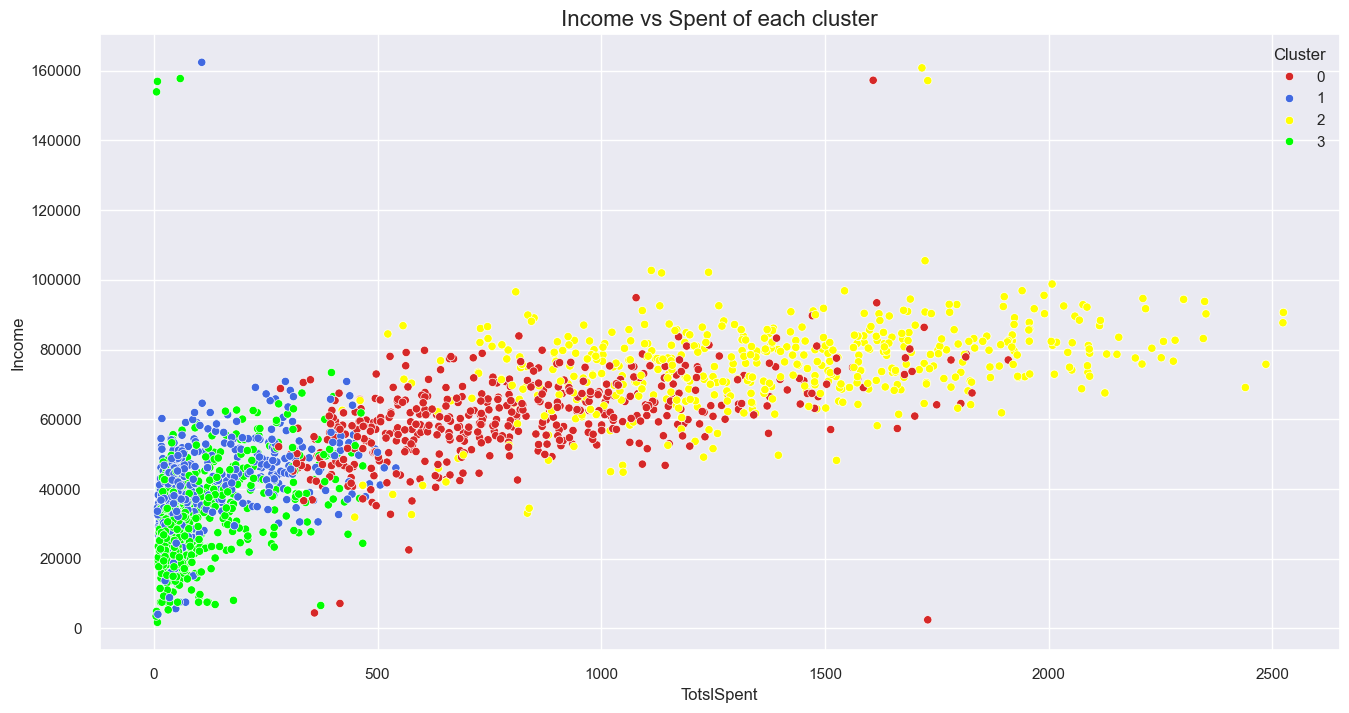

In [34]:
print(df.groupby(['Cluster'])[['Income', 'TotslSpent']].agg('sum'))
cprint('*'*50,'green')
spentscatter = sns.scatterplot(data = df,x=df["TotslSpent"], y=df["Income"],hue=df["Cluster"], palette= colorpalt)
spentscatter.set_title('Income vs Spent of each cluster',fontsize=16)

Text(0.5, 1.0, 'Money Spent In Each Cluster')

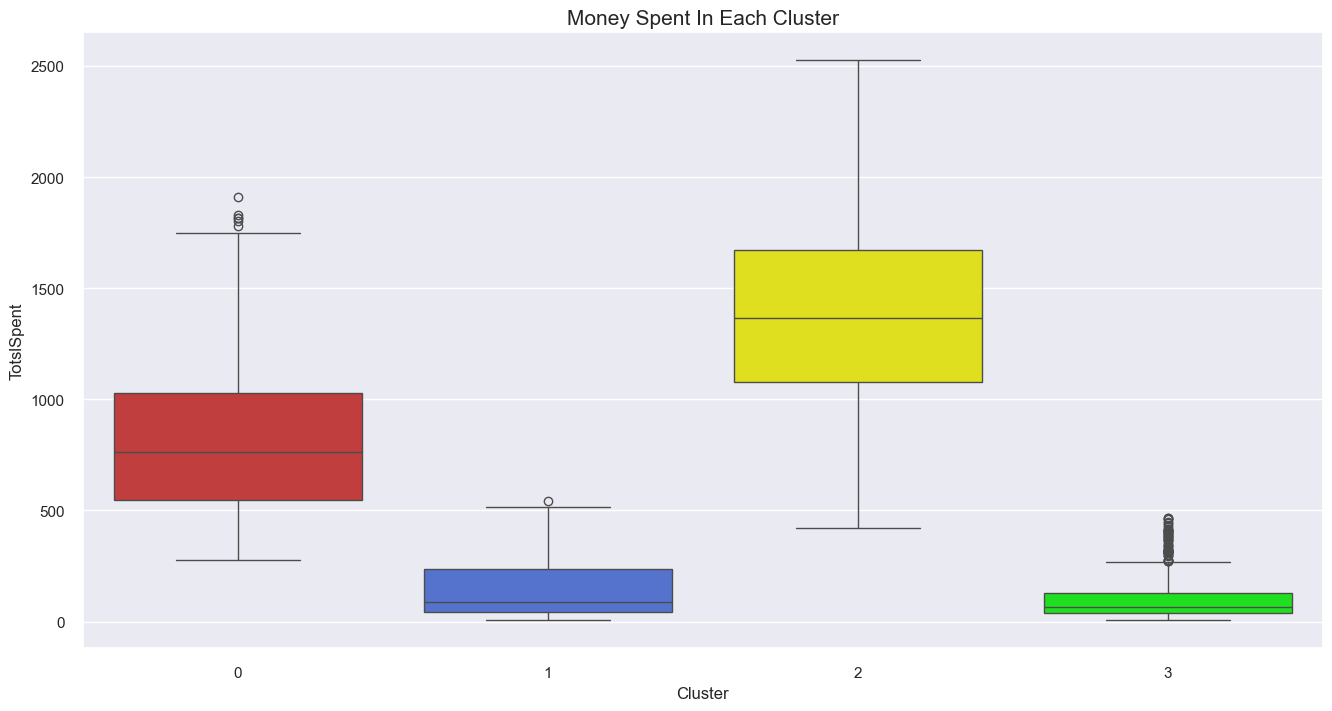

In [35]:
spentbox =sns.boxplot(x=df["Cluster"], y=df["TotslSpent"], palette=colorpalt)
spentbox.set_title("Money Spent In Each Cluster", size=15)

In [36]:
print(df.groupby(['Cluster', 'TotalPromotions']).size())

Cluster  TotalPromotions
0        0                  409
         1                   98
         2                   22
         3                    6
1        0                  409
         1                   42
         2                    2
2        0                  313
         1                  121
         2                   55
         3                   38
         4                   11
3        0                  609
         1                   53
         2                    1
dtype: int64


Text(0.5, 1.0, 'Accepted Promotions In Each Cluster')

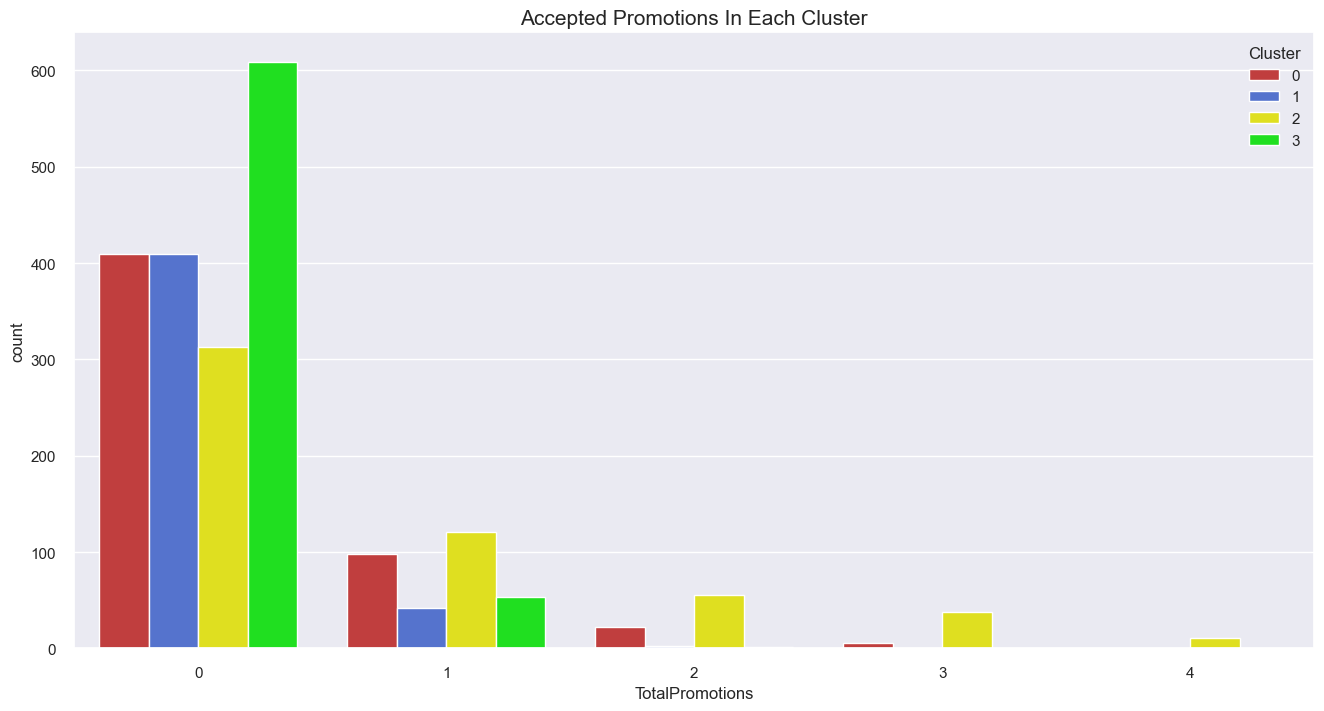

In [37]:
totalPromotioncount = sns.countplot(x=df['TotalPromotions'],hue=df['Cluster'], palette= colorpalt)
totalPromotioncount.set_title("Accepted Promotions In Each Cluster", size=15)

### **Berapa jumlah anggota keluarga pelanggan di setiap cluster?**

Cluster  FamilySize
0        1               7
         2             262
         3             229
         4              35
         5               2
1        2              13
         3             260
         4             166
         5              14
2        1             309
         2             207
         3              22
3        1              74
         2             406
         3             183
dtype: int64


Text(0.5, 1.0, 'FamilySize In Each Cluster')

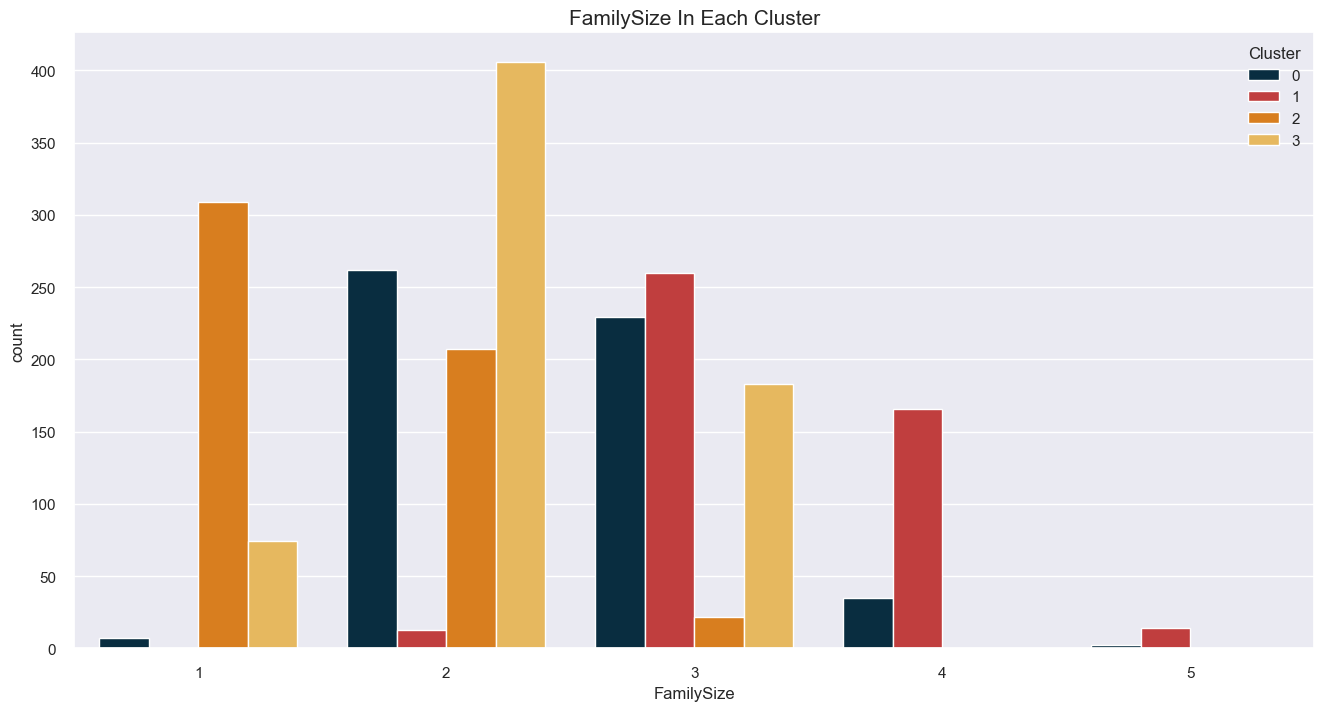

In [38]:
print(df.groupby(['Cluster','FamilySize']).size())

familySizecount = sns.countplot(x=df['FamilySize'],hue=df['Cluster'], palette=["#003049","#d62828", "#f77f00", "#fcbf49", "#eae2b7"])
familySizecount.set_title("FamilySize In Each Cluster", size=15)

### **Apakah orang tua dan jumlah anak untuk setiap cluster?**

Cluster  Children
0        0            10
         1           445
         2            75
         3             5
1        1            72
         2           336
         3            45
2        0           462
         1            76
3        0           137
         1           521
         2             5
dtype: int64
**************************************************


Text(0.5, 1.0, 'Num of Children In Each Cluster')

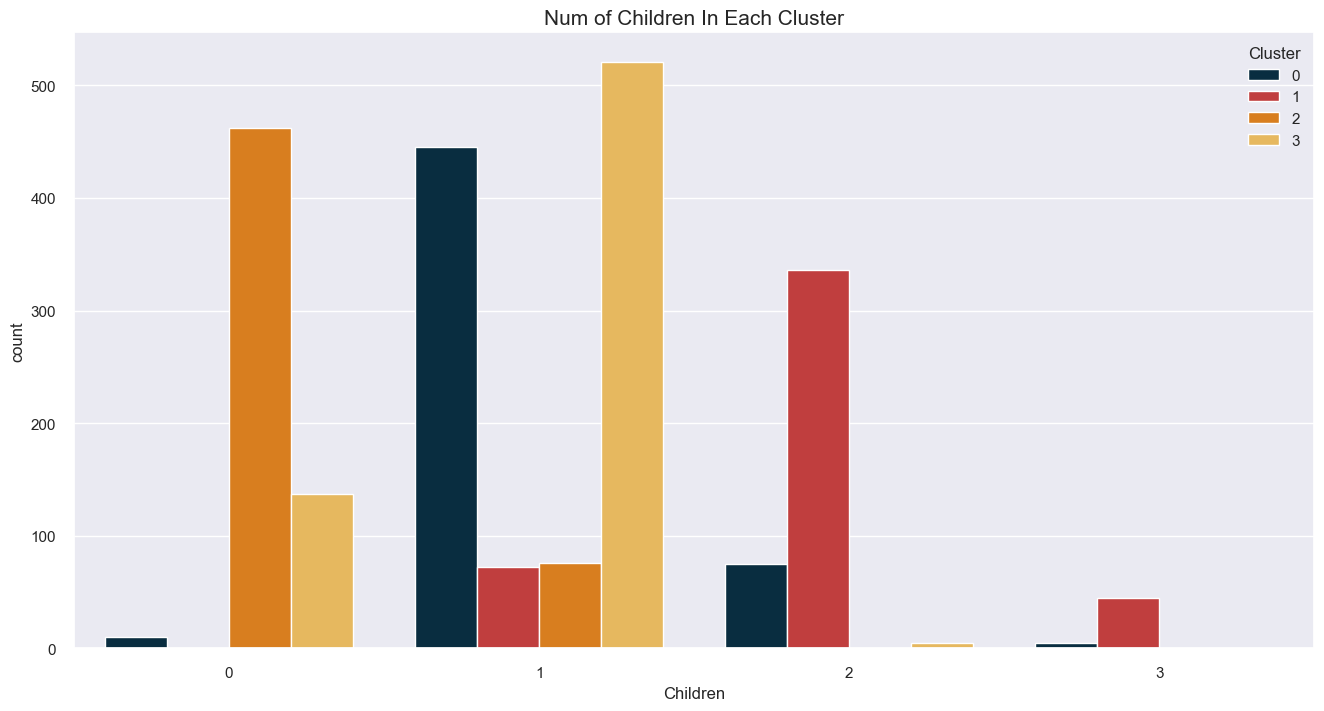

In [39]:
print(df.groupby(['Cluster','Children']).size())
cprint('*'*50,'green')
familySizecount = sns.countplot(x=df['Children'],hue=df['Cluster'], palette=["#003049","#d62828", "#f77f00", "#fcbf49", "#eae2b7"])
familySizecount.set_title("Num of Children In Each Cluster", size=15)

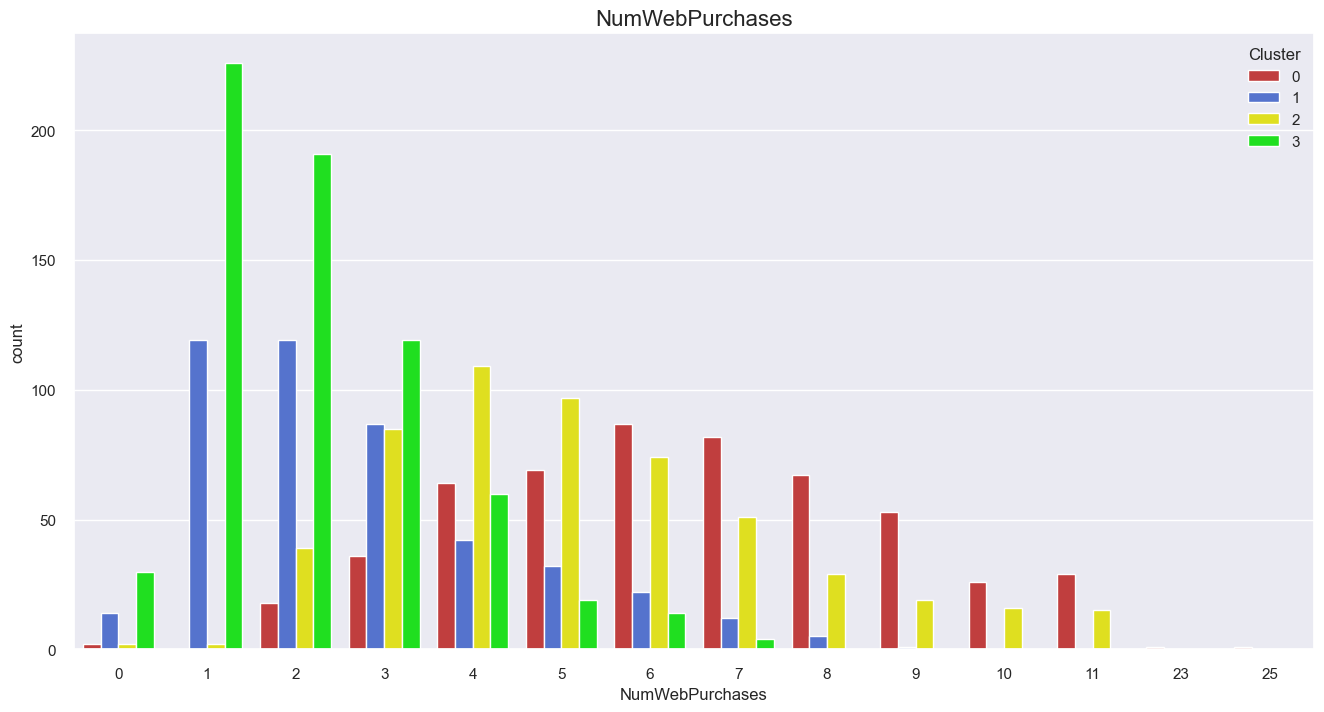

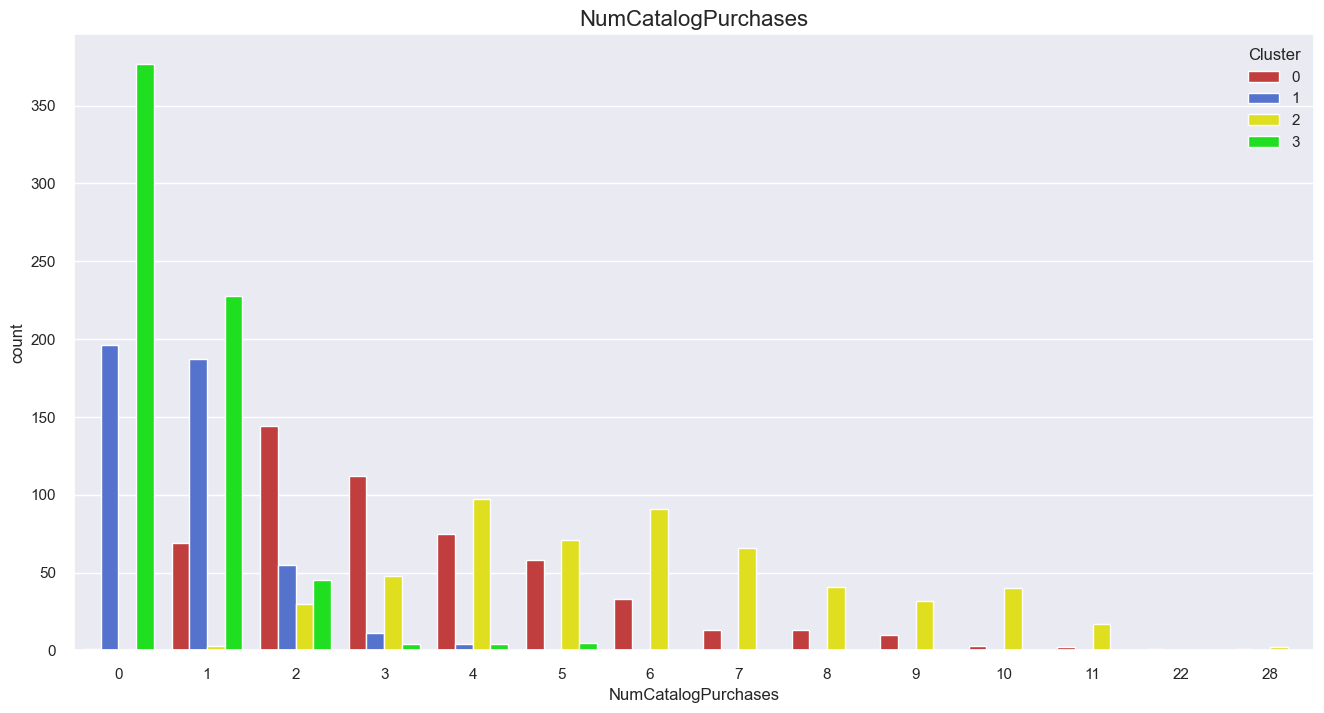

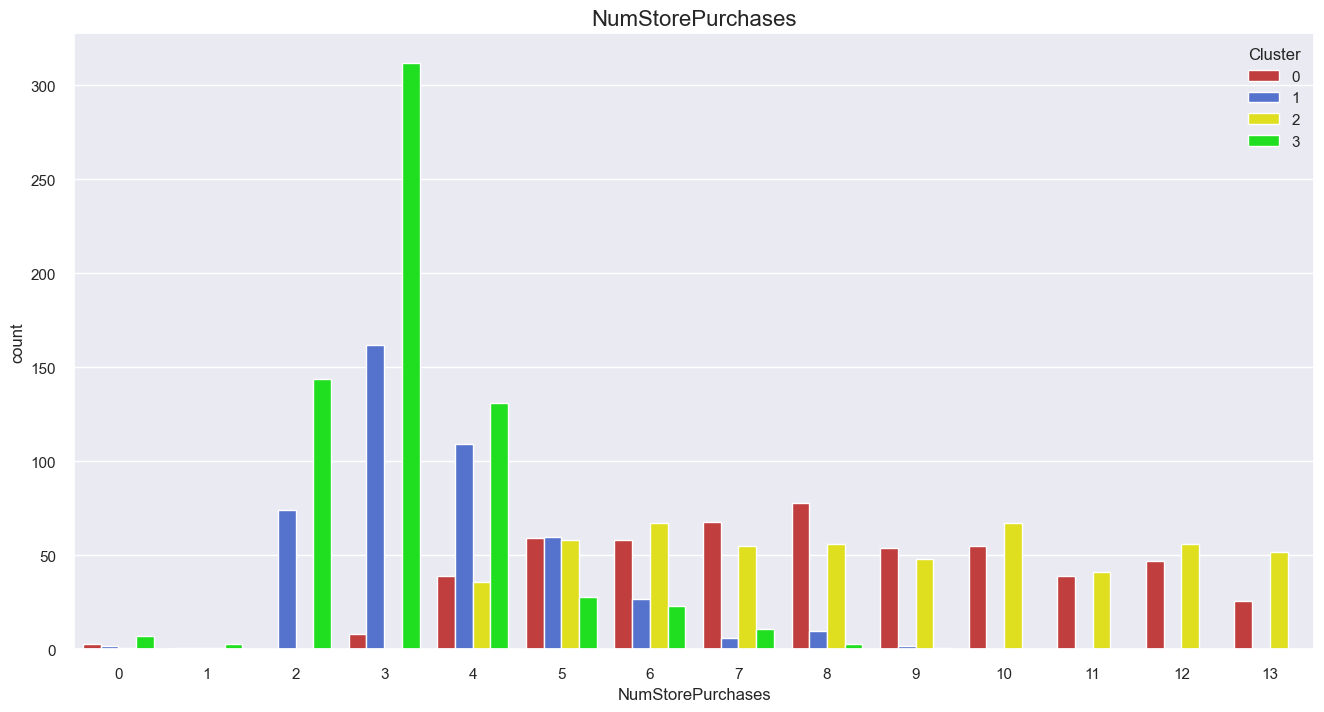

In [40]:
Places = ['NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases']

for i in Places:
    plt.figure()
    sns.countplot(x=df[i],hue=df["Cluster"], palette= colorpalt).set_title(f'{i}',size=16)
    plt.show()

Avg Age of each cluster : 
Cluster
0    59.508411
1    58.653422
2    54.522305
3    48.666667
Name: Age, dtype: float64
None
**************************************************
Maximum Age of each cluster : 
Cluster
0    78
1    78
2    78
3    78
Name: Age, dtype: int64
None
**************************************************
Minimum Age of each cluster : 
Cluster
0    34
1    38
2    29
3    28
Name: Age, dtype: int64
None
**************************************************


Text(0.5, 1.0, 'Age In Each Cluster')

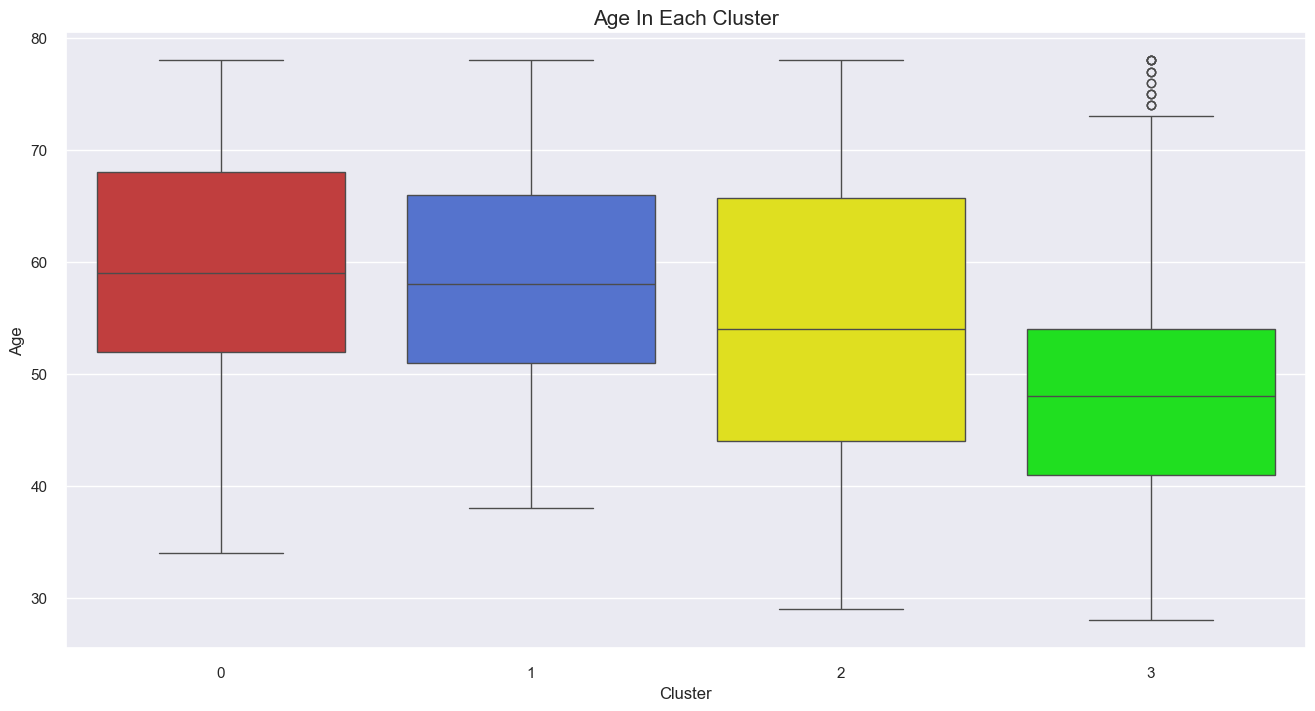

In [41]:
cprint('Avg Age of each cluster : ','green')
print(print(df.groupby(['Cluster'])['Age'].agg('mean')))
cprint('*'*50)
cprint('Maximum Age of each cluster : ','green')
print(print(df.groupby(['Cluster'])['Age'].agg('max')))
cprint('*'*50)
cprint('Minimum Age of each cluster : ','green')
print(print(df.groupby(['Cluster'])['Age'].agg('min')))
cprint('*'*50)
agebox=sns.boxplot(x=df["Cluster"], y=df["Age"], palette=colorpalt)
agebox.set_title("Age In Each Cluster", size=15)

### **Jumlah pembelian di setiap cluster ?**

Cluster
0     9640
1     3230
2    10573
3     3922
Name: TotalPurchases, dtype: int64


Text(0.5, 1.0, 'Total Purchases In Each Clusters')

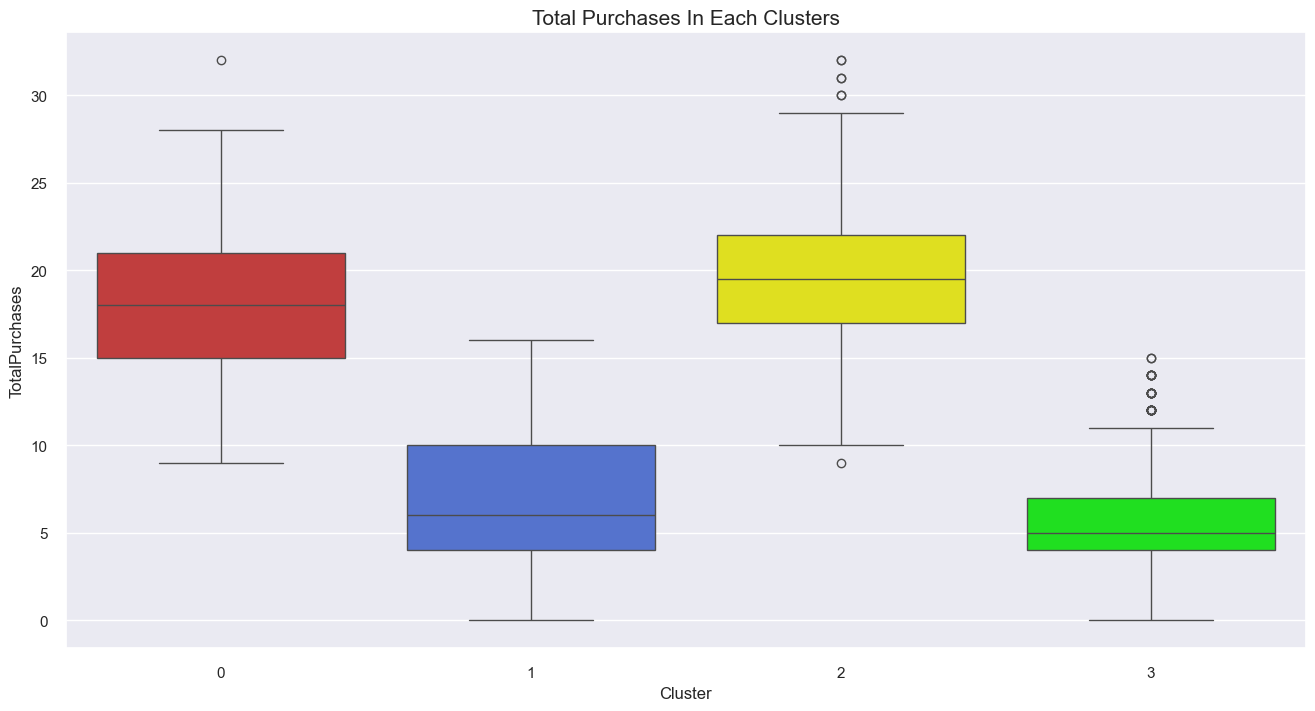

In [42]:
print(df.groupby(['Cluster'])['TotalPurchases'].agg('sum'))
purchasesbox=sns.boxplot(x=df["Cluster"], y=df["TotalPurchases"], palette=colorpalt)
purchasesbox.set_title("Total Purchases In Each Clusters", size=15)

### **Apa yang ingin dibeli oleh setiap cluster?**

         MntWines  MntFruits  MntMeatProducts  MntSweetProducts  MntGoldProds
Cluster                                                                      
0          268914      14506            86102             14941         34862
1           37202       1847            13843              1765          7832
2          332135      36413           245981             37620         42111
3           24176       4322            16840              4524         11495
**************************************************


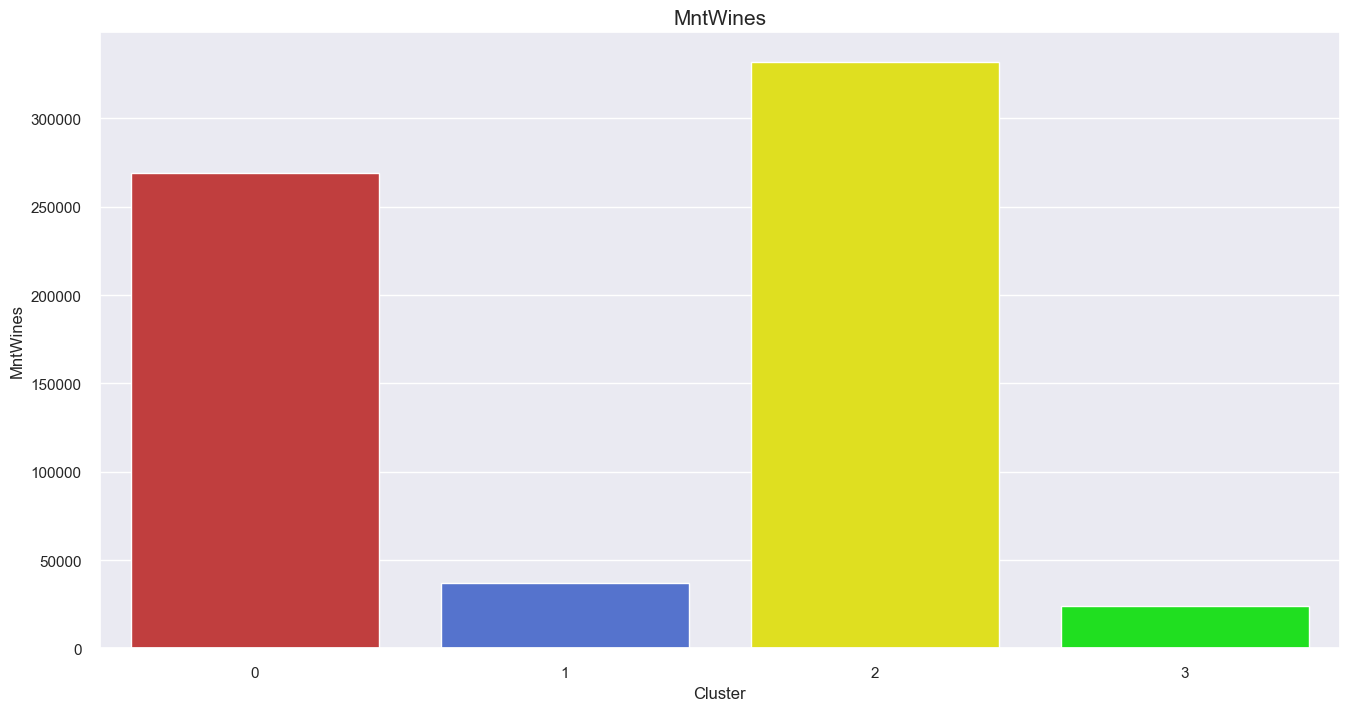

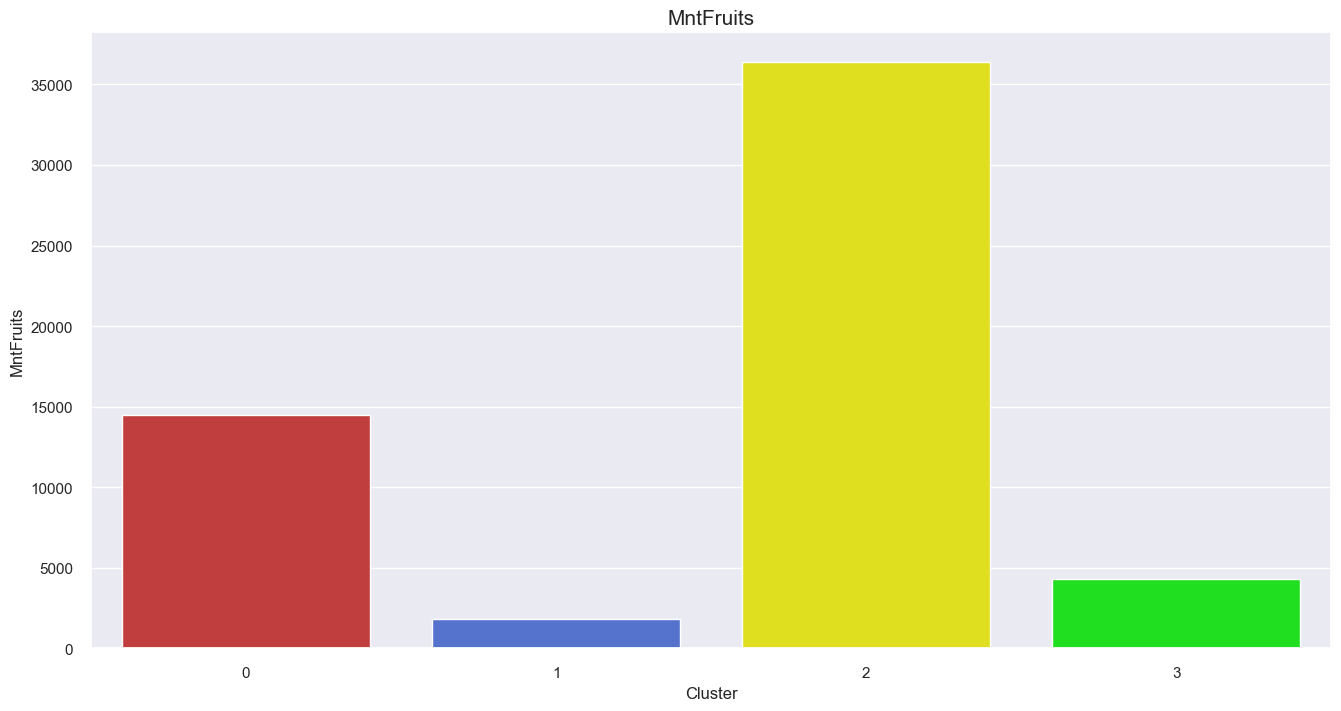

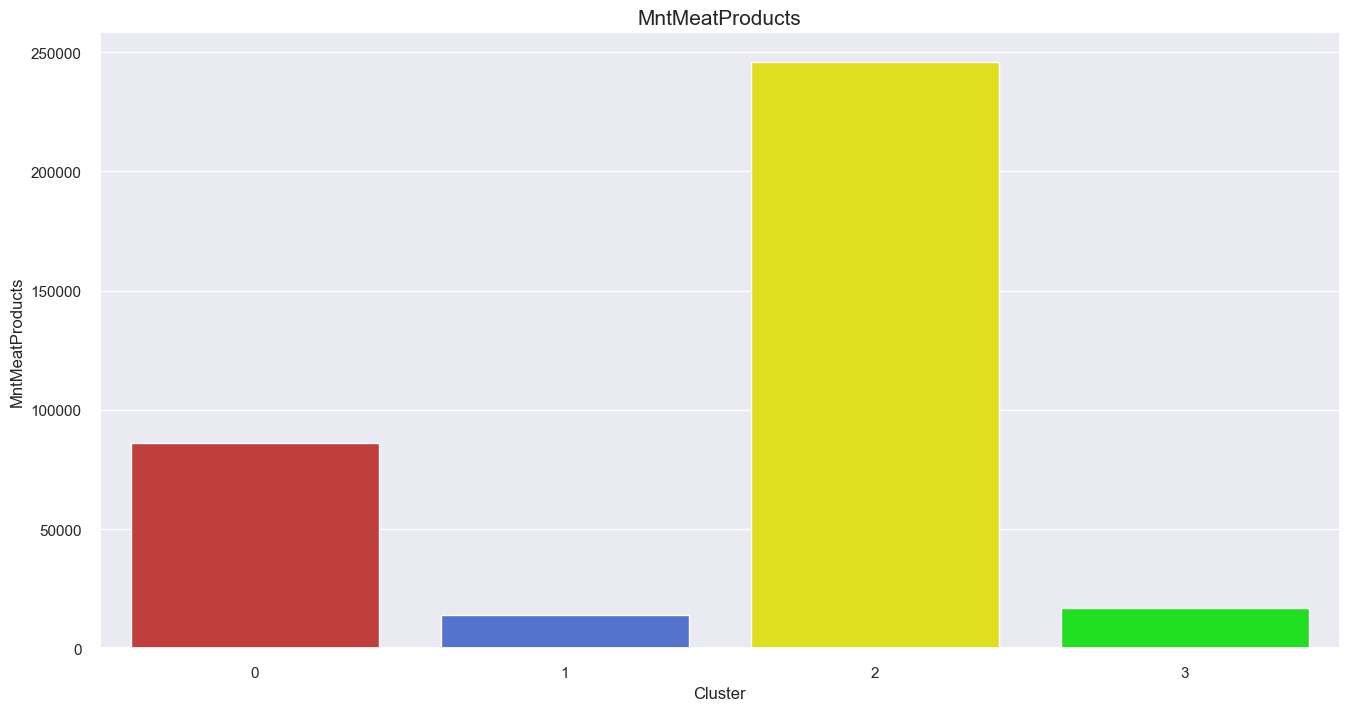

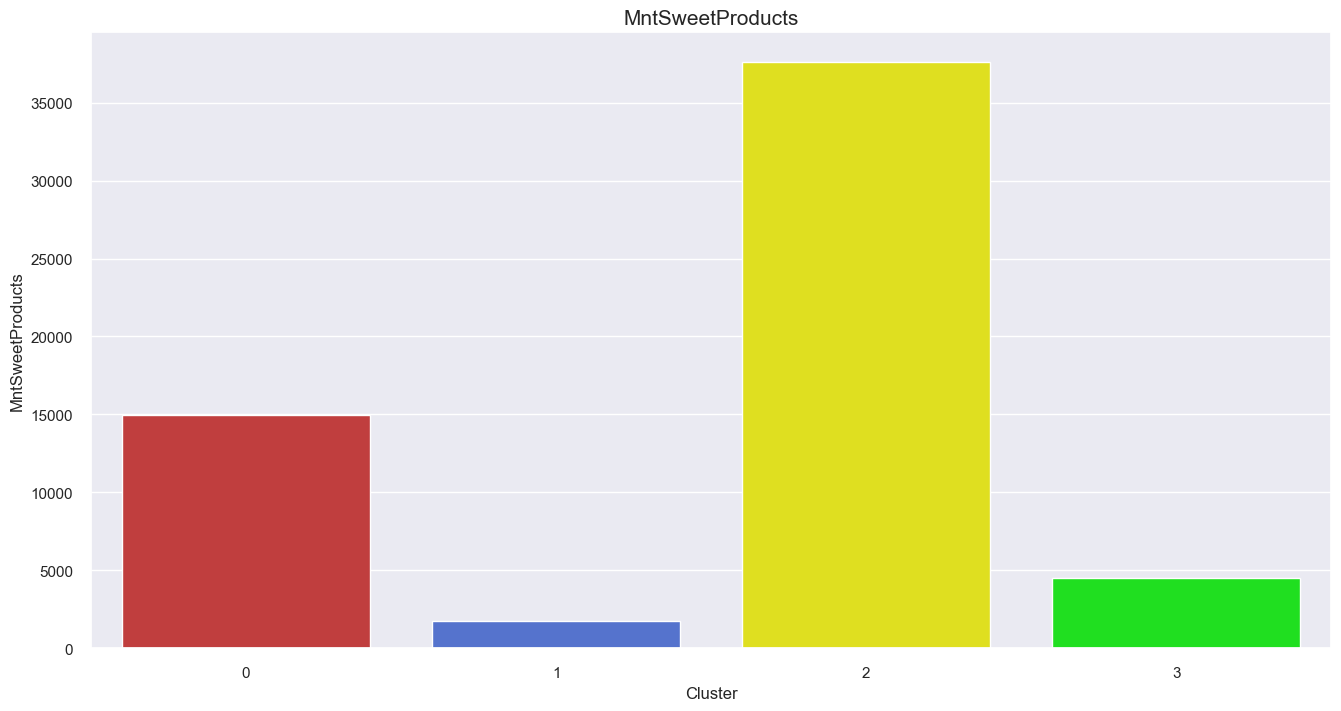

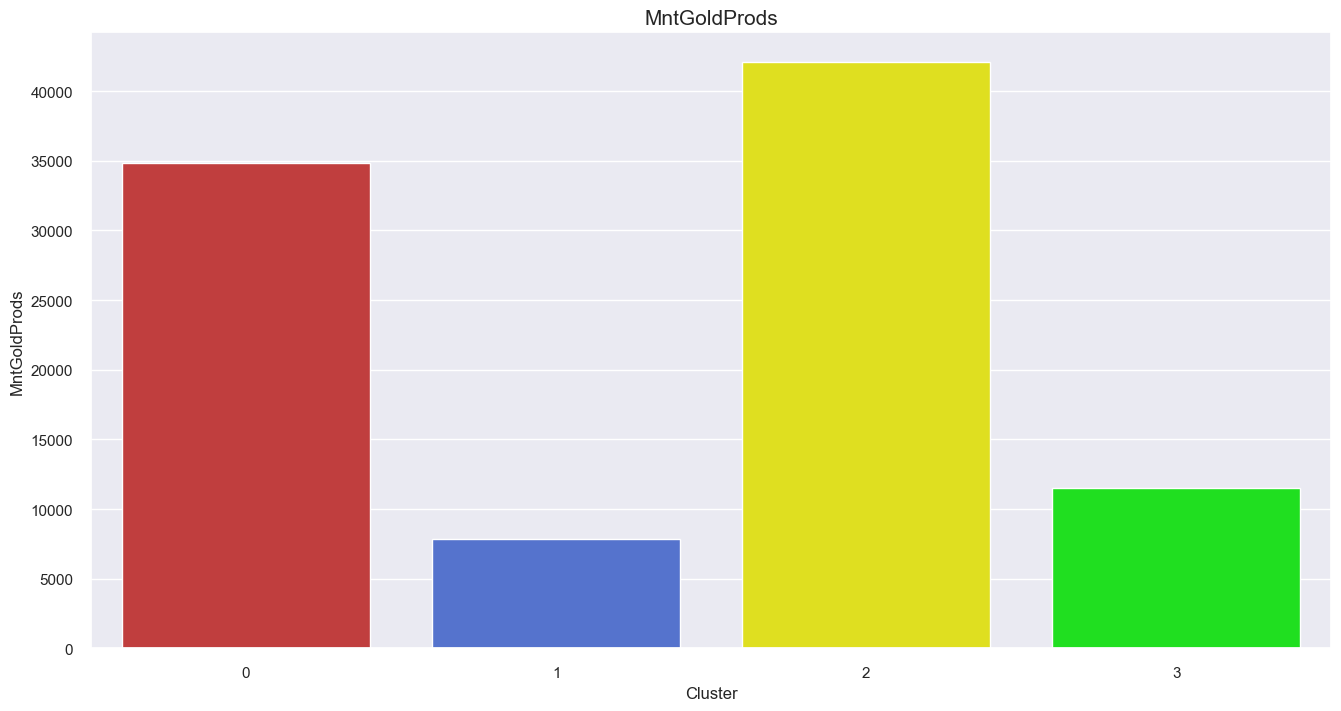

In [44]:
df_buying = df.groupby(['Cluster'])[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntSweetProducts', 'MntGoldProds']].agg('sum')
print(df_buying)
cprint('*'*50,'green')
Products = ['MntWines','MntFruits','MntMeatProducts','MntSweetProducts','MntGoldProds']
for i in Products:
    plt.figure()
    sns.barplot(y=df_buying[i],x=df_buying.index, palette=colorpalt).set_title(f'{i}',size=15)
    plt.show()

### **Bagaimana status perkawinan di masing-masing cluster?**

Cluster  Marital_Status
0        1                 312
         2                 223
1        1                 245
         2                 208
2        1                 363
         2                 175
3        1                 422
         2                 241
dtype: int64
**************************************************


Text(0.5, 1.0, 'Marital Status In Each Cluster')

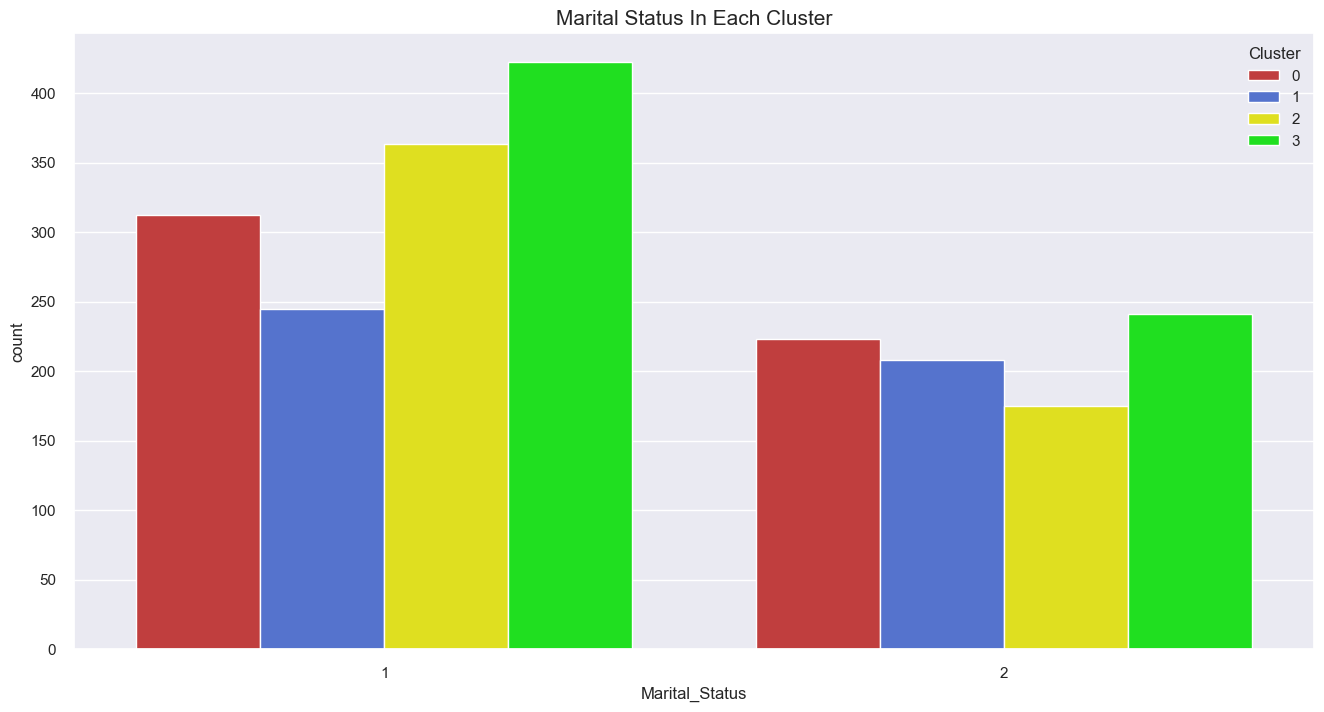

In [45]:
print(df.groupby(['Cluster', 'Marital_Status']).size())
cprint('*'*50,'green')
maritalcount = sns.countplot(x=df['Marital_Status'],hue=df["Cluster"], palette= colorpalt)
maritalcount.set_title("Marital Status In Each Cluster", size=15)

Cluster  Education
0        0             28
         1            507
1        0             34
         1            419
2        0             58
         1            480
3        0            132
         1            531
dtype: int64
**************************************************


Text(0.5, 1.0, 'Education Status In Each Cluster')

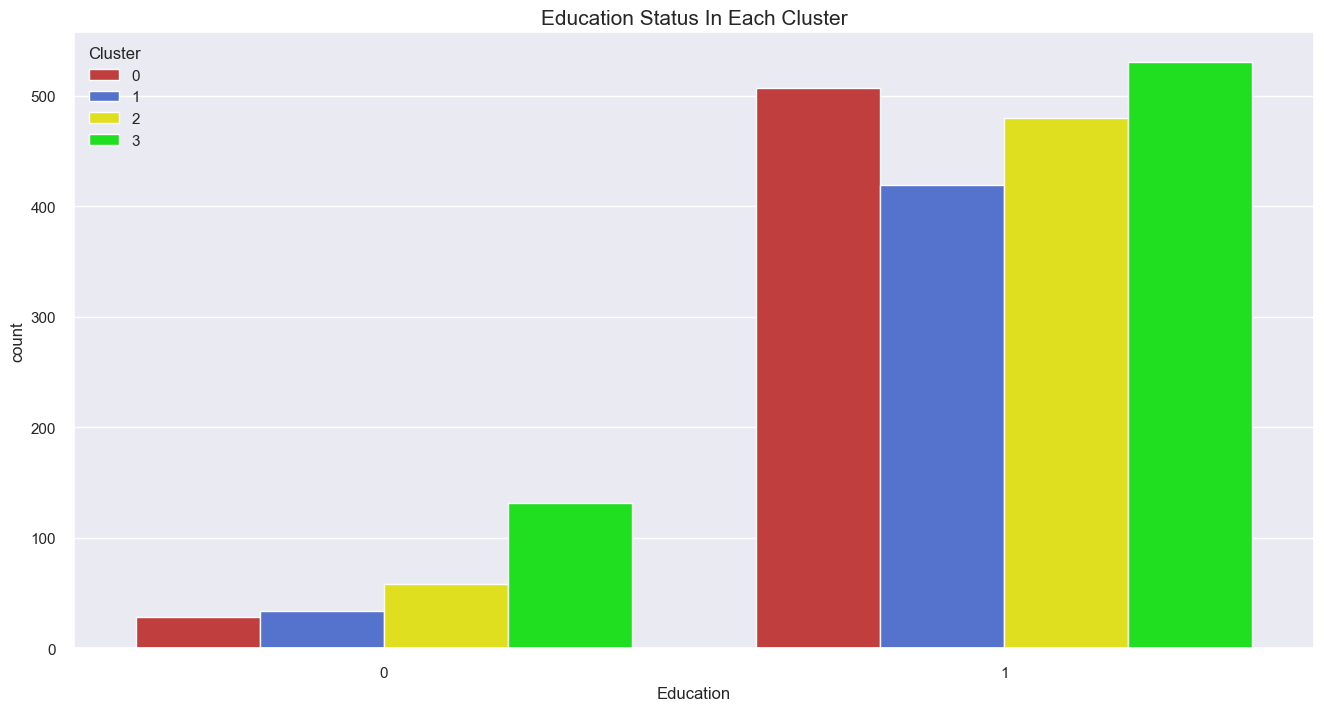

In [46]:
print(df.groupby(['Cluster', 'Education']).size())
cprint('*'*50,'green')
educount = sns.countplot(x=df['Education'],hue=df["Cluster"], palette= colorpalt)
educount.set_title("Education Status In Each Cluster", size=15)

### **Klaster manakah yang lebih tertarik pada diskon?**

Num of discount buying for each Cluster :
Cluster
0    1908
1    1397
2     675
3    1136
Name: NumDealsPurchases, dtype: int64
**************************************************


<Axes: xlabel='Cluster', ylabel='NumDealsPurchases'>

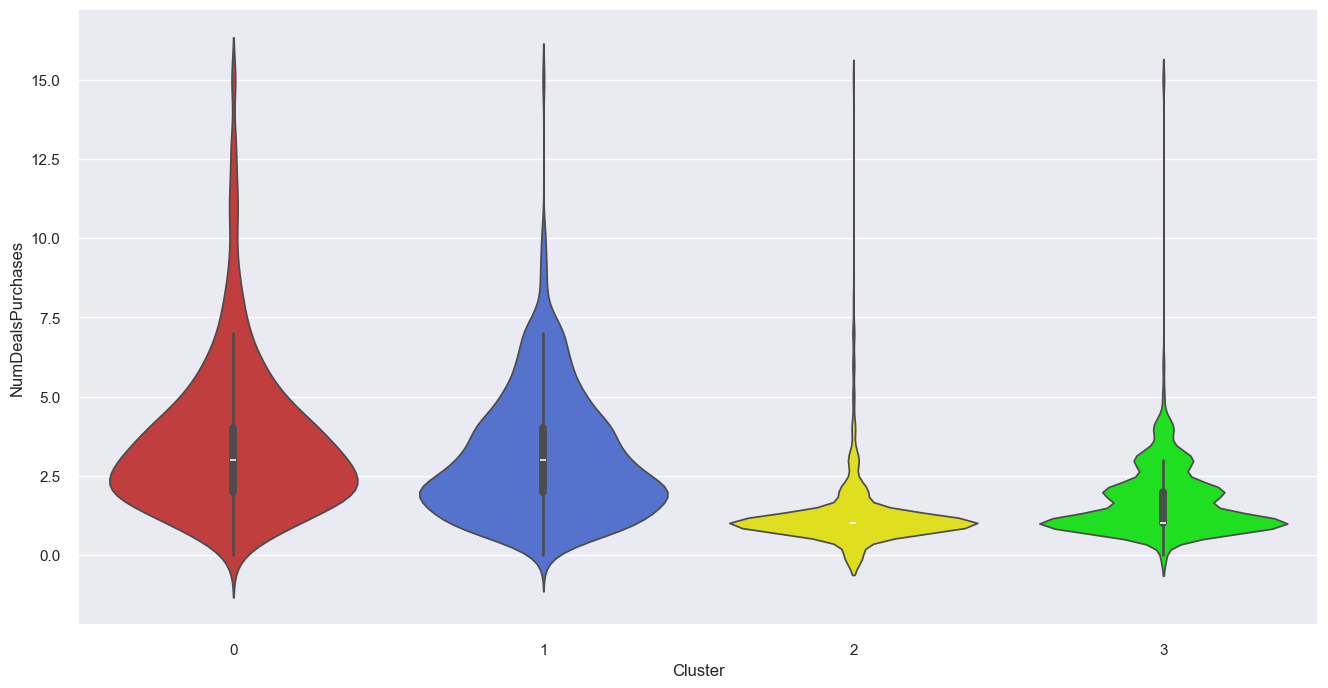

In [47]:
cprint('Num of discount buying for each Cluster :','green')
print(df.groupby(['Cluster'])['NumDealsPurchases'].agg('sum'))
cprint('*'*50,'green')
sns.violinplot(x=df["Cluster"], y=df["NumDealsPurchases"], palette=colorpalt)